# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/KevQuant/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


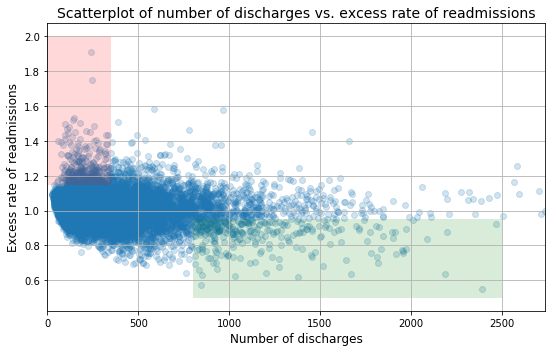

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01 (i.e. significance level). 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

Ans:
Although the above scatterplot shows the proportion of readmission rate are distinctly different between facilities with lower **(i.e. <100)** and higher **(i.e. >1000)** discharge rate, especially in the red and green filled area, we could not simply conclude their readmission rate are significant different from each other. In this case, I would suggest to perform Hypotheses Test to determine whether their mean value of readmission rates are significantly different. 

### B. Hypotheses Test

So that now we first set up our hypotheses

- Null Hypothesis H0:  mu_100 = mu_1000
- Alt. Hypothesis Ha: mu_100 <> mu_1000

where

- mu_100 = Readmission rate for hospitals/facilities with discharge <100
- mu_1000 = Readmission rate for hospitals/facilities with discharge > 1000

**Hypotheses Test for facilities with discharge >1000 and <100**

Acccording to the following Hypotheses Test with significance level = 0.01, we can conclude to reject the Mull Hypotheses. In other words, this sampling experiment implies that the Mean of facilities with number of dicharge >1000 and <100 are signficant different from each other. The result tells us that 98% of time the facilities with discharge >1000 has readmission rate range 0.971 - 0.998; the facilities with discharge <100 has readmission rate range 1.018 - 1.026. 

With these figures, we could agree the provided scatterplot result: There is a significant correlation between hospital capacity (number of discharges) and readmission rates. So that I would also agree with the recommendation to upgrade the facilities with less number of discharge rate. 



In [109]:
df =  clean_hospital_read_df.copy()
print("Summary")
print("%d facilities with Discharge Rate > 1000"%(df["Number of Readmissions"][df["Number of Discharges"]>1000].shape))
print("%d facilities with Discharge Rate <100"%(df["Number of Readmissions"][df["Number of Discharges"]<100].shape))

Summary
463 facilities with Discharge Rate > 1000
1269 facilities with Discharge Rate <100


In [111]:
import random
from sklearn.utils import resample

#Sampling test
tempLst1 = np.array(list(df["Excess Readmission Ratio"][df["Number of Discharges"]>1000])) #Convert the temperature list to numpy array
bLst=[]
cnt=0
t_stat = 2.33 # t-statistic for  95% C.I.

bLst1 = resample(tempLst1, n_samples = len(tempLst1))

print("Statistics for Facilities with Number of Discharge >1000 ")
print()
print("Number of Samples per Trail (Degree of Freedom:):", len(tempLst1))
print("t-statistic (from table):", t_stat)
print("Mean of Bootstrapped Samples:",np.mean(bLst1))
print("Std of Bootstrapped Samples:",np.std(bLst1))
print("Confidence Interval for  is %0.3f - %0.3f"%(np.mean(bLst1)-(np.std(bLst1) * t_stat/ np.sqrt(len(bLst1))), np.mean(bLst1)+(np.std(bLst1) * t_stat / np.sqrt(len(bLst1)))))

Statistics for Facilities with Number of Discharge >1000 

Number of Samples per Trail (Degree of Freedom:): 463
t-statistic (from table): 2.33
Mean of Bootstrapped Samples: 0.984464794816
Std of Bootstrapped Samples: 0.12123863155
Confidence Interval for  is 0.971 - 0.998


In [112]:
import random
from sklearn.utils import resample

tempLst2 = np.array(list(df["Excess Readmission Ratio"][df["Number of Discharges"]<100])) #Convert the temperature list to numpy array
#Elimate all the nonetype from the list
tempLst3=[]
for x in list(tempLst2):
    try:
        int(x)
        tempLst3.append(x)
    except:
        pass

#Sampling Test
bLst=[]
cnt=0
t_stat = 2.33 # t-statistic for  95% C.I.

bLst2 = resample(tempLst3, n_samples = len(tempLst3))

print("Statistics for Facilities with Number of Discharge <100 ")
print()
print("Number of Samples per Trail (Degree of Freedom:):", len(tempLst3))
print("t-statistic (from table):", t_stat)
print("Mean of Bootstrapped Samples:",np.mean(bLst2))
print("Std of Bootstrapped Samples:",np.std(bLst2))
print("Confidence Interval for  is %0.3f - %0.3f"%(np.mean(bLst2)-(np.std(bLst2) * t_stat/ np.sqrt(len(bLst2))), np.mean(bLst2)+(np.std(bLst2) * t_stat / np.sqrt(len(bLst2)))))

Statistics for Facilities with Number of Discharge <100 

Number of Samples per Trail (Degree of Freedom:): 1188
t-statistic (from table): 2.33
Mean of Bootstrapped Samples: 1.0221236532
Std of Bootstrapped Samples: 0.0579426914521
Confidence Interval for  is 1.018 - 1.026


### What are the advantages and disadvantages of using scatterplot to convey information?

With using the above scatterplot to illustrate the data point, we find the 
- Advantage: Easy to observe the spread of data point along either x or y variables
- Disadvantage: NOT easy to compare distribution between different group of data points

### Histogram
-The histogram below not only shows the spread of data point, it also shows the trend of distribution difference/margin between two distinct group of data.

/Users/KevQuant/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


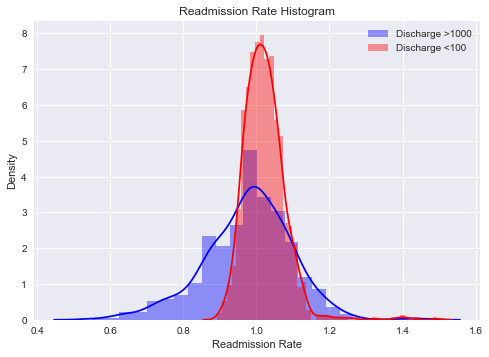

In [115]:
from scipy.stats import norm
import seaborn as sns
ax = sns.distplot(tempLst1,  color="b", label = "Discharge >1000");
ax = sns.distplot(tempLst3,  color="r", label = "Discharge <100");
ax.set_title("Readmission Rate Histogram")
ax.set_ylabel("Density")
ax.set_xlabel("Readmission Rate")
plt.legend()
plt.show()